In [1]:
import numpy as np
import matplotlib.cm as cm
from geo_tool import Mesh
# from geo_tool.solids.plotting import plot_mesh_via_plottly as plot_mesh
from geo_tool.solids.plotting import plot_mesh_via_matplotlib as plot_mesh
from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
from sklearn.cluster import KMeans

import helper
from helper import load_meshes, load_gt_latent_params
from general_tools.plotting import stack_images_in_square_grid, stack_images_horizontally
from general_tools.clustering.convenience import find_nearest_neighbors

In [2]:
%matplotlib nbagg
# %matplotlib inline
%load_ext autoreload
%autoreload 2

pwd = %pwd

In [3]:
plot_poses = False

if plot_poses:
    exemplar_pose_models = range(1, 2001, 250)
    print exemplar_pose_models
    exemplar_pose_models = load_meshes(exemplar_pose_models)
    
    plt.ioff()
    out_images = []
    for i, in_m in enumerate(exemplar_pose_models):
        f = plot_mesh(in_m, show=False)
        f.savefig('temp_%d.png' % (i,))
        plt.close()
        out_images.append(pwd + '/temp_%d.png' % (i,))
    plt.ion()
    stack_images_horizontally(out_images[:4])
    stack_images_horizontally(out_images[4:])

In [5]:
top_data_dir = '/orions4-zfs/projects/optas/DATA/OUT/latent_diff_maps/experiments/human_poses_non_0_1_variations/'
helper.top_ananth_data_dir = '/orions4-zfs/projects/optas/DATA/Meshes/SCAPE_8_poses_non_0_1_variations/'

In [6]:
seed = 42
n_classes = 12
gt_latent_params = load_gt_latent_params(250)
unsup_clf = KMeans(n_clusters=n_classes, random_state=seed)
unsup_labels = unsup_clf.fit_predict(gt_latent_params)

In [7]:
# np.unique(unsup_labels, return_counts=True)
from scipy.stats import kstest
x = unsup_labels
kstest(x, 'uniform', args=(min(x), max(x)))

KstestResult(statistic=0.11468181818181816, pvalue=0.0)

In [98]:
# find most-diff clusters
# from scipy.spatial.distance import pdist, squareform
# squareform(pdist(unsup_clf.cluster_centers_))

array([[ 0.        ,  0.76977292,  0.72566816,  0.77607423,  0.79771265,
         0.80231935,  0.80351017,  0.72740245,  0.77948073,  0.82586588,
         0.75381326,  0.774081  ],
       [ 0.76977292,  0.        ,  0.78618252,  0.78103276,  0.75679382,
         0.7813796 ,  0.73815119,  0.7423383 ,  0.78230674,  0.81316006,
         0.79738242,  0.80613004],
       [ 0.72566816,  0.78618252,  0.        ,  0.79307064,  0.77750526,
         0.81461054,  0.75202987,  0.81379367,  0.75228207,  0.78960106,
         0.8591777 ,  0.88367427],
       [ 0.77607423,  0.78103276,  0.79307064,  0.        ,  0.74487809,
         0.75593786,  0.87864164,  0.76798897,  0.72470814,  0.87413377,
         0.77516651,  0.78696111],
       [ 0.79771265,  0.75679382,  0.77750526,  0.74487809,  0.        ,
         0.78275161,  0.75568766,  0.7482876 ,  0.78763752,  0.84712909,
         0.7804014 ,  0.8114573 ],
       [ 0.80231935,  0.7813796 ,  0.81461054,  0.75593786,  0.78275161,
         0.        ,  

<IPython.core.display.Javascript object>


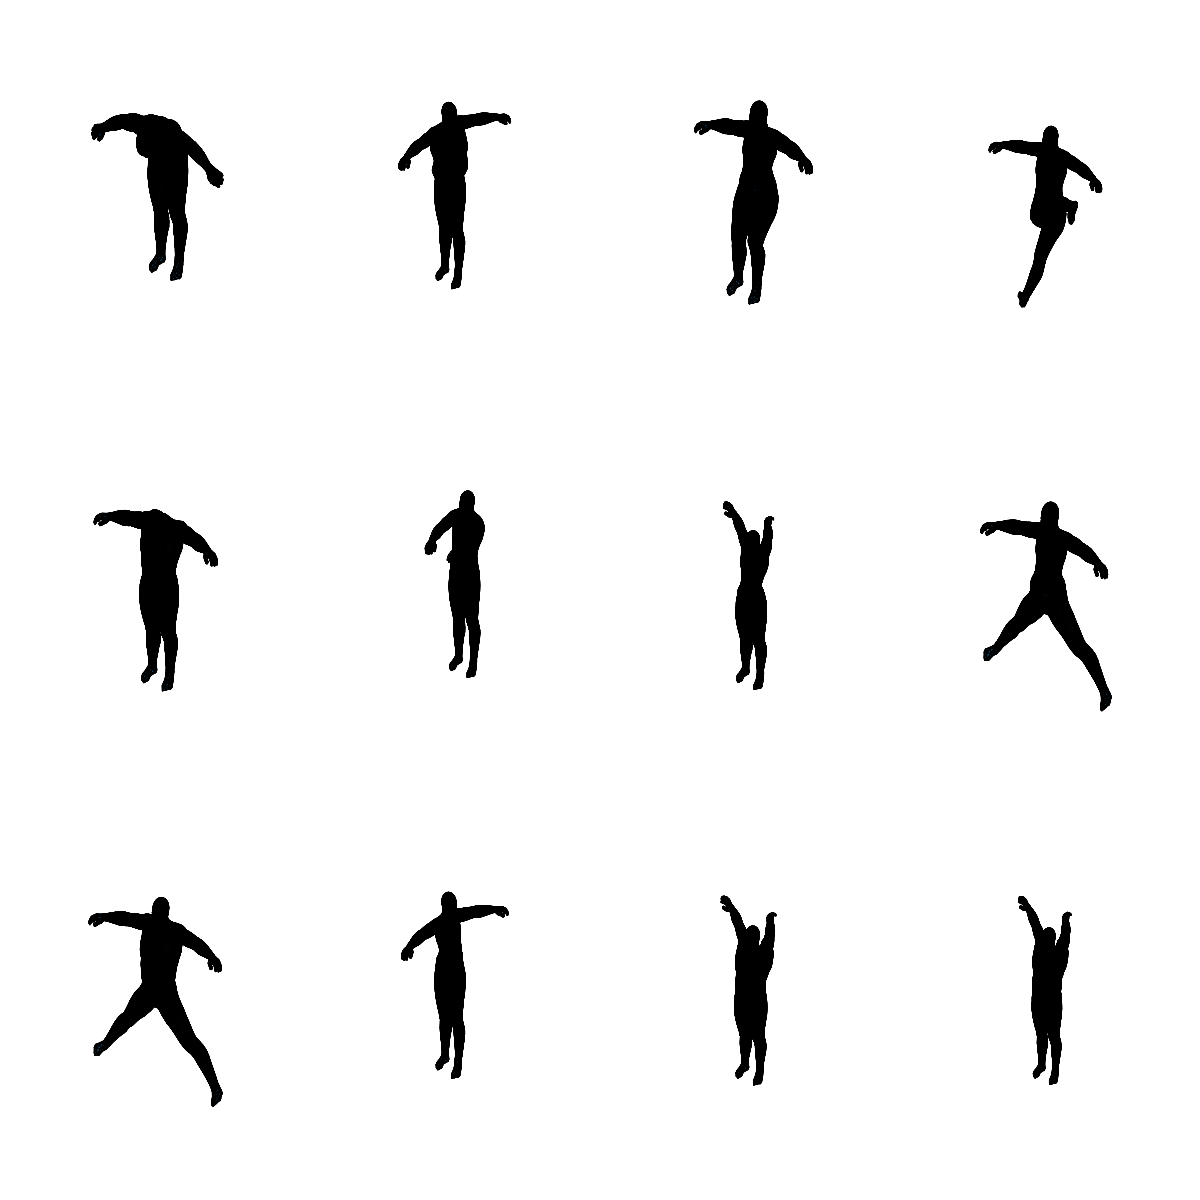

In [9]:
# Plot NN of each centroid
reps = []

for c in unsup_clf.cluster_centers_:
    cen = c.reshape(1, n_classes)
    rep = find_nearest_neighbors(cen, gt_latent_params, k=1)[0][0][0]
    reps.append(rep)
reps = np.array(reps)

picked = load_meshes(reps + 1)

plot_meshes_on_grid(picked, (3, 4), fig_size=(12,12));

In [114]:
c_id = 5
c = unsup_clf.cluster_centers_[c_id].reshape(1, n_classes)
ids = np.where(unsup_labels==c_id)[0]
p = gt_latent_params[ids]
ids2 = find_nearest_neighbors(c, p, k=9)[0][0]
ids = ids[ids2]
picked = load_meshes(ids + 1)

In [135]:

picked = load_meshes(np.where(unsup_labels==1)[0][:10] + 1)

In [8]:
import matplotlib.pylab as plt
def plot_meshes_on_grid(meshes, grid_size, fig_size=(10, 10), plot_kwargs={}):
    fig = plt.figure(figsize=fig_size)
    c = 1
    for mesh in meshes:
        plt.subplot(grid_size[0], grid_size[1], c, projection='3d')
        plt.axis('off')
        ax = fig.axes[c - 1]
        plot_mesh(mesh, axis=ax, show=False)
        c += 1
    return fig

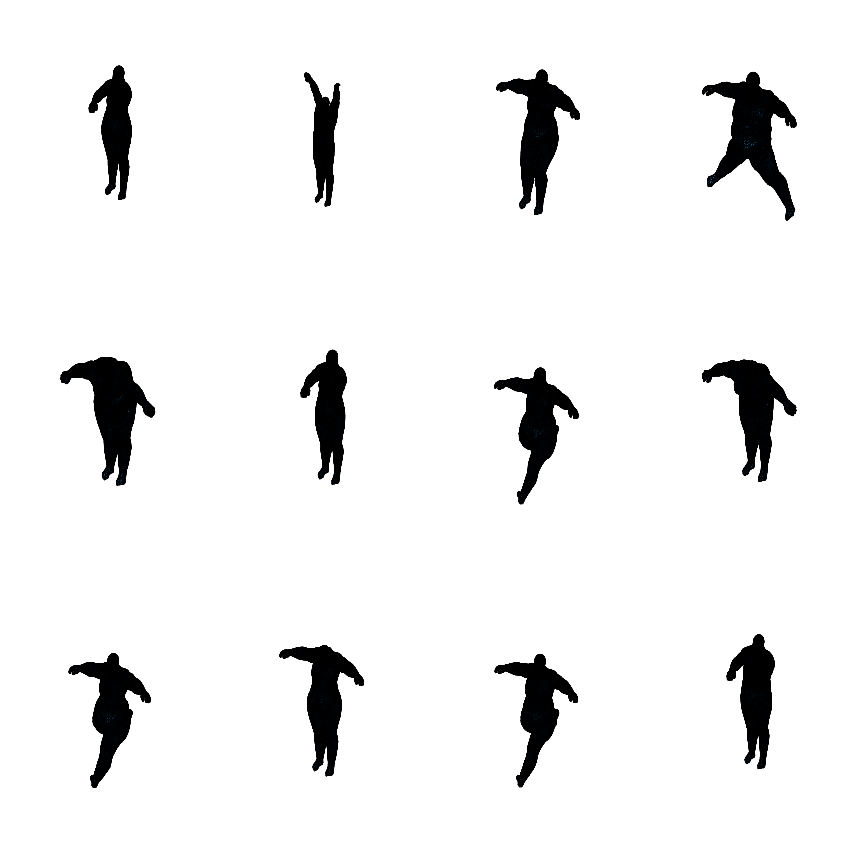

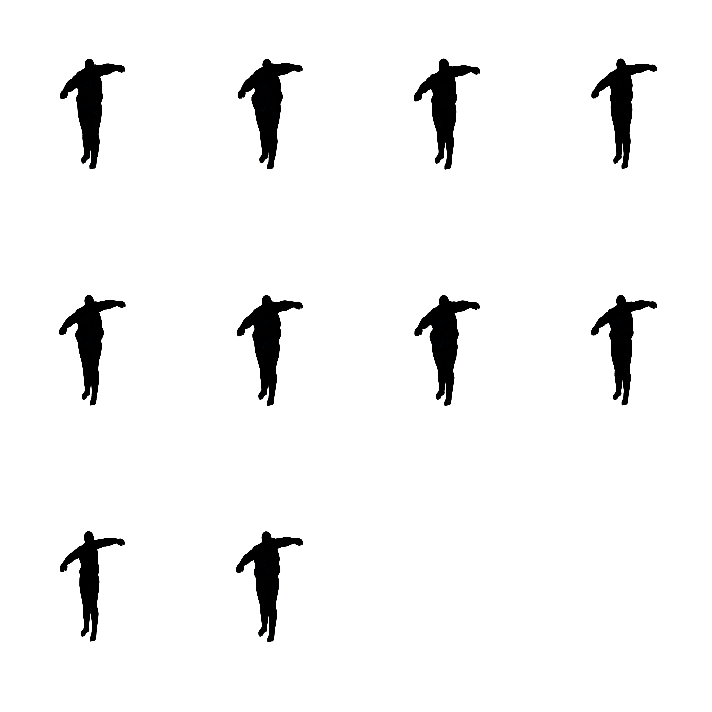

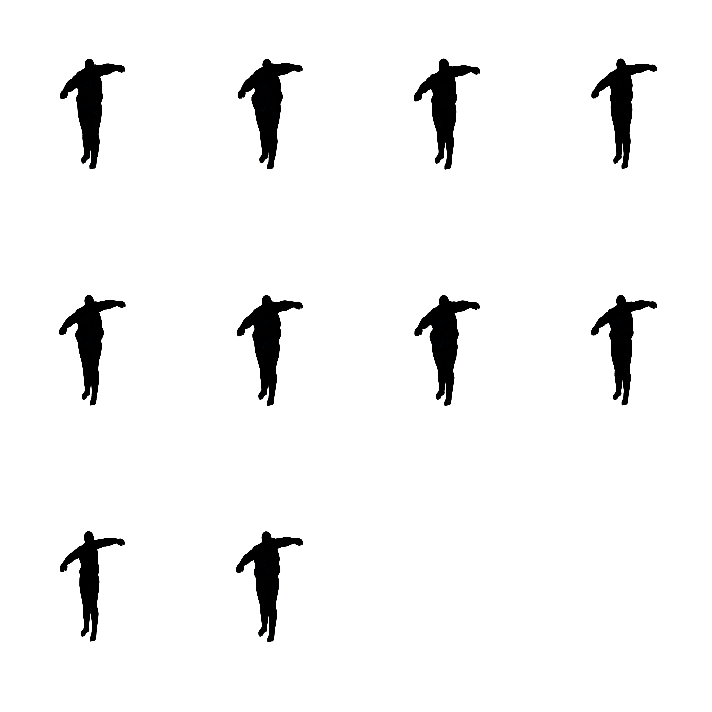

In [138]:
plot_meshes_on_grid(picked, (3, 4), fig_size=(10,10))